In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Import all necessary libraries

## DATA

This dataset contains comprehensive information on 2,392 high school students, detailing their demographics, study habits, parental involvement, extracurricular activities, and academic performance. The target variable, GradeClass, classifies students' grades into distinct categories, providing a robust dataset for educational research, predictive modeling, and statistical analysis.

### Table of Contents
Student ID
<br>Demographic Details:
<br>Study Habits
<br>Parental Involvement
<br>Extracurricular Activities
<br>Academic Performance
<br>Target Variable: Grade Class


#### Student Information

StudentID: A unique identifier assigned to each student (1001 to 3392).

#### Demographic Details
Age: The age of the students ranges from 15 to 18 years.

Gender: Gender of the students, where 0 represents Male and 1 represents Female.

Ethnicity: The ethnicity of the students, coded as follows:
0: Caucasian <br>
1: African American<br>
2: Asian<br>
3: Other<br>
#### Parental Information
ParentalEducation: The education level of the parents, coded as follows:
<br>0: None
<br>1: High School
<br>2: Some College
<br>3: Bachelor's
<br>4: Higher

ParentalSupport: The level of parental support, coded as follows:
<br>0: None
<br>1: Low
<br>2: Moderate
<br>3: High
<br>4: Very High

#### Study Habits
StudyTimeWeekly: Weekly study time in hours, ranging from 0 to 20.<br>
Absences: Number of absences during the school year, ranging from 0 to 30.<br>
Tutoring: Tutoring status, where 0 indicates No and 1 indicates Yes.

#### Extracurricular Activities
Extracurricular: Participation in extracurricular activities, where 0 indicates No and 1 indicates Yes.<br>
Sports: Participation in sports, where 0 indicates No and 1 indicates Yes.<br>
Music: Participation in music activities, where 0 indicates No and 1 indicates Yes.<br>
Volunteering: Participation in volunteering, where 0 indicates No and 1 indicates Yes.

#### Academic Performance
GPA: Grade Point Average on a scale from 2.0 to 4.0, influenced by study habits, parental involvement, and extracurricular activities.
Target Variable: Grade Class

GradeClass: Classification of students' grades based on GPA:<br>
0: 'A' (GPA >= 3.5)<br>
1: 'B' (3.0 <= GPA < 3.5)<br>
2: 'C' (2.5 <= GPA < 3.0)<br>
3: 'D' (2.0 <= GPA < 2.5)<br>
4: 'F' (GPA < 2.0)

In [27]:
raw_data = pd.read_csv('Student_performance_data _.csv')
raw_data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0




1.   StudentID is key column which doesn't provide any information.
2.   Extracurricular, Sports, Music, Volunteering provides information about whether a student is involved in something other than academics. Let's add a column Any_Extracurricular which will be 1 if a student participates in anything other than academics.



In [28]:
raw_data['Any_Extracurricular'] = raw_data[['Extracurricular', 'Sports', 'Music', 'Volunteering']].max(axis=1)
raw_data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,Any_Extracurricular
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0,1
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0,0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0,0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0,1
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0,0


Check for missing values

In [29]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   StudentID            2392 non-null   int64  
 1   Age                  2392 non-null   int64  
 2   Gender               2392 non-null   int64  
 3   Ethnicity            2392 non-null   int64  
 4   ParentalEducation    2392 non-null   int64  
 5   StudyTimeWeekly      2392 non-null   float64
 6   Absences             2392 non-null   int64  
 7   Tutoring             2392 non-null   int64  
 8   ParentalSupport      2392 non-null   int64  
 9   Extracurricular      2392 non-null   int64  
 10  Sports               2392 non-null   int64  
 11  Music                2392 non-null   int64  
 12  Volunteering         2392 non-null   int64  
 13  GPA                  2392 non-null   float64
 14  GradeClass           2392 non-null   float64
 15  Any_Extracurricular  2392 non-null   i

In [30]:
raw_data.isnull().sum()

StudentID              0
Age                    0
Gender                 0
Ethnicity              0
ParentalEducation      0
StudyTimeWeekly        0
Absences               0
Tutoring               0
ParentalSupport        0
Extracurricular        0
Sports                 0
Music                  0
Volunteering           0
GPA                    0
GradeClass             0
Any_Extracurricular    0
dtype: int64

Drop columns: StudentID, Extracurricular, Sports, Music, Volunteering

In [31]:
raw_data.drop(['StudentID', 'Extracurricular', 'Sports', 'Music', 'Volunteering'], axis=1, inplace=True)
raw_data.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,GPA,GradeClass,Any_Extracurricular
0,17,1,0,2,19.833723,7,1,2,2.929196,2.0,1
1,18,0,0,1,15.408756,0,0,1,3.042915,1.0,0
2,15,0,2,3,4.210570,26,0,2,0.112602,4.0,0
3,17,1,0,3,10.028829,14,0,3,2.054218,3.0,1
4,17,1,0,2,4.672495,17,1,3,1.288061,4.0,0


In [32]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  2392 non-null   int64  
 1   Gender               2392 non-null   int64  
 2   Ethnicity            2392 non-null   int64  
 3   ParentalEducation    2392 non-null   int64  
 4   StudyTimeWeekly      2392 non-null   float64
 5   Absences             2392 non-null   int64  
 6   Tutoring             2392 non-null   int64  
 7   ParentalSupport      2392 non-null   int64  
 8   GPA                  2392 non-null   float64
 9   GradeClass           2392 non-null   float64
 10  Any_Extracurricular  2392 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 205.7 KB


In [33]:
categorical_columns = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Any_Extracurricular','GradeClass']
raw_data[categorical_columns] = raw_data[categorical_columns].astype('object')

print(raw_data.dtypes)

Age                      int64
Gender                  object
Ethnicity               object
ParentalEducation       object
StudyTimeWeekly        float64
Absences                 int64
Tutoring                object
ParentalSupport         object
GPA                    float64
GradeClass              object
Any_Extracurricular     object
dtype: object


In [34]:
raw_data.describe()

,Age,StudyTimeWeekly,Absences,GPA
count,2392.000000,2392.000000,2392.000000,2392.000000
mean,16.468645,9.771992,14.541388,1.906186
std,1.123798,5.652774,8.467417,0.915156
min,15.000000,0.001057,0.000000,0.000000
25%,15.000000,5.043079,7.000000,1.174803
50%,16.000000,9.705363,15.000000,1.893393
75%,17.000000,14.408410,22.000000,2.622216
max,18.000000,19.978094,29.000000,4.000000


## Exploratory Data Analysis

In [35]:
raw_data.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,GPA,GradeClass,Any_Extracurricular
0,17,1,0,2,19.833723,7,1,2,2.929196,2.0,1
1,18,0,0,1,15.408756,0,0,1,3.042915,1.0,0
2,15,0,2,3,4.210570,26,0,2,0.112602,4.0,0
3,17,1,0,3,10.028829,14,0,3,2.054218,3.0,1
4,17,1,0,2,4.672495,17,1,3,1.288061,4.0,0


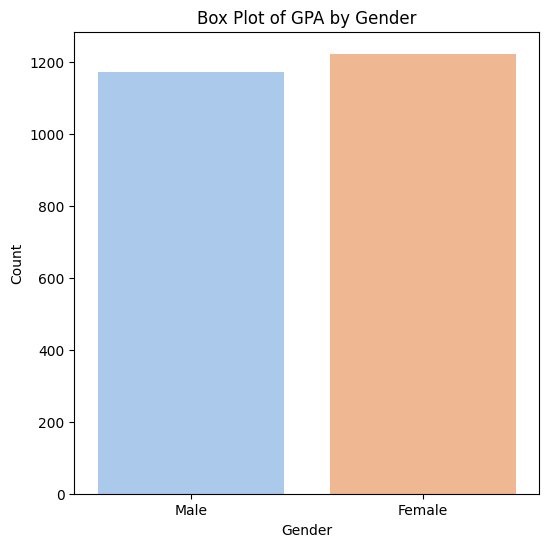

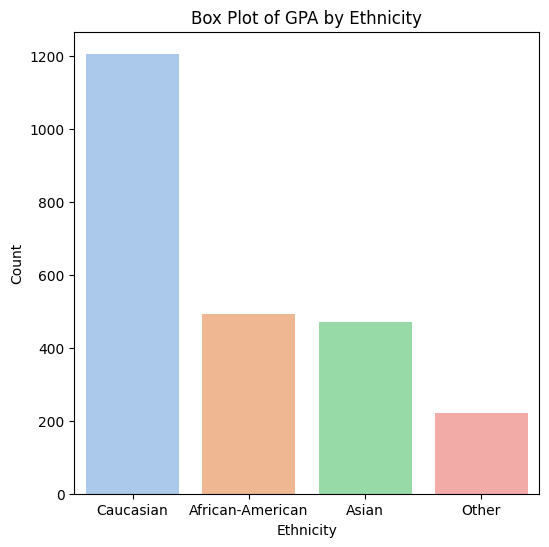

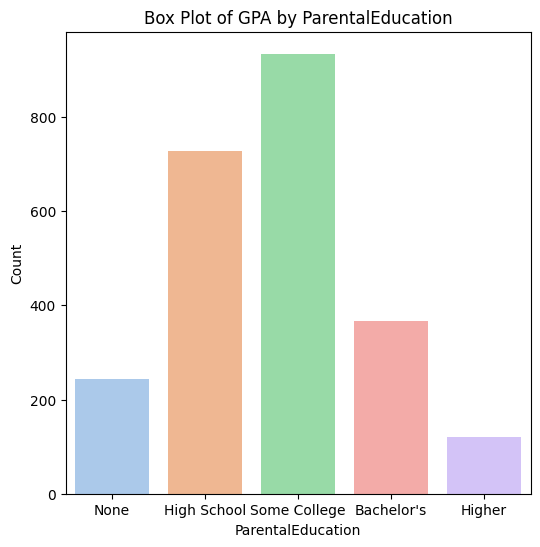

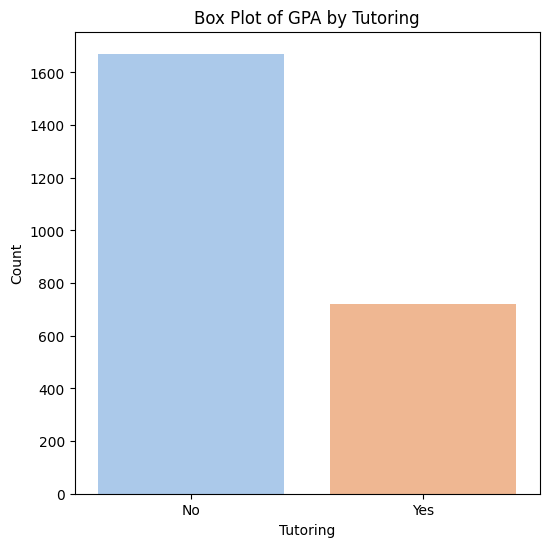

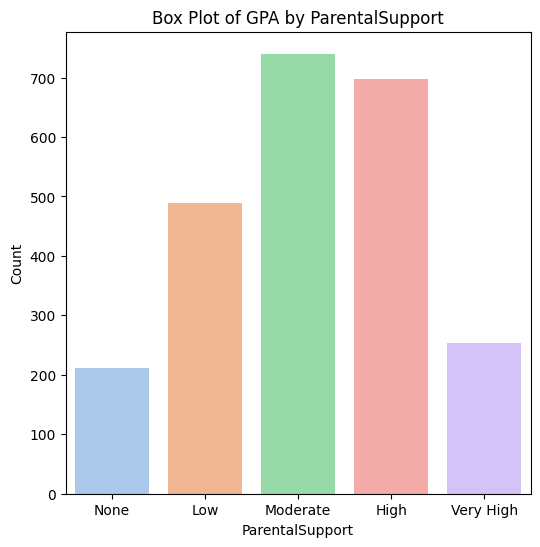

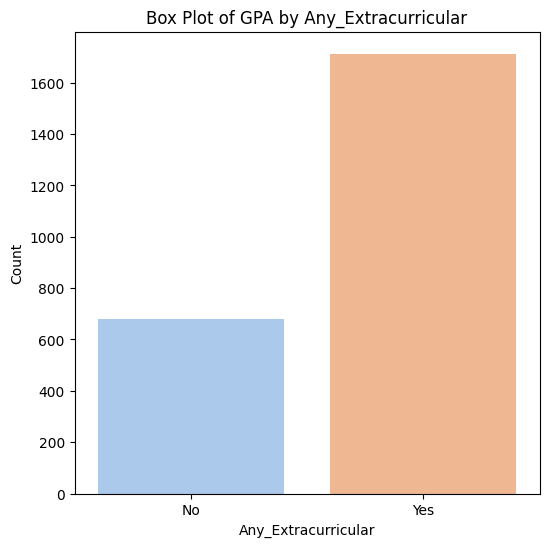

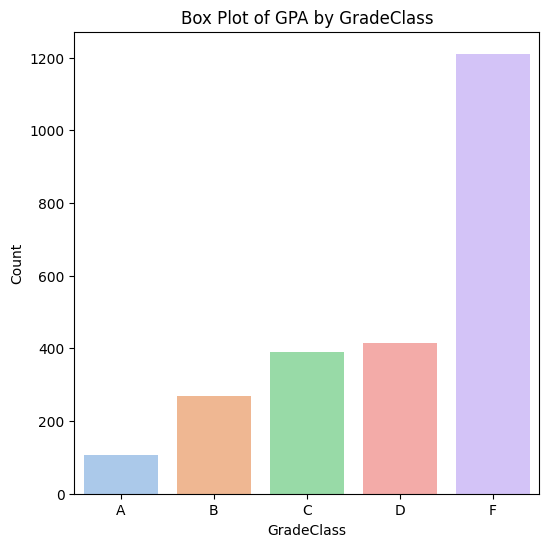

In [36]:
categorical_columns = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Any_Extracurricular', 'GradeClass']
labels = {
    'Gender': ['Male', 'Female'],
    'Ethnicity': ['Caucasian', 'African-American', 'Asian', 'Other'],
    'ParentalEducation': ['None', 'High School', 'Some College', 'Bachelor\'s', 'Higher'],
    'Tutoring': ['No', 'Yes'],
    'ParentalSupport': ['None', 'Low', 'Moderate', 'High', 'Very High'],
    'Any_Extracurricular': ['No', 'Yes'],
    'GradeClass':['A','B','C','D','F']
}

for column in categorical_columns:
    plt.figure(figsize=(6, 6))

    sns.countplot(x=column,data=raw_data, palette="pastel")
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f'Box Plot of GPA by {column}')

    if column in labels:
        plt.xticks(ticks=range(len(labels[column])), labels=labels[column])
    plt.show()

We can see the distributions of the categorical variables.<br>


*   The data is balanced between males and females.
*   The data consists of more than half Caucassian people.
*   Parental Education and Parental support seems to be Normally distributed.
*   Most students participate in one or the other extra curricular activities.
*   Almost 1/3 rd students receive tutoring.
*   More than half of the students seem to be struggling in academics.


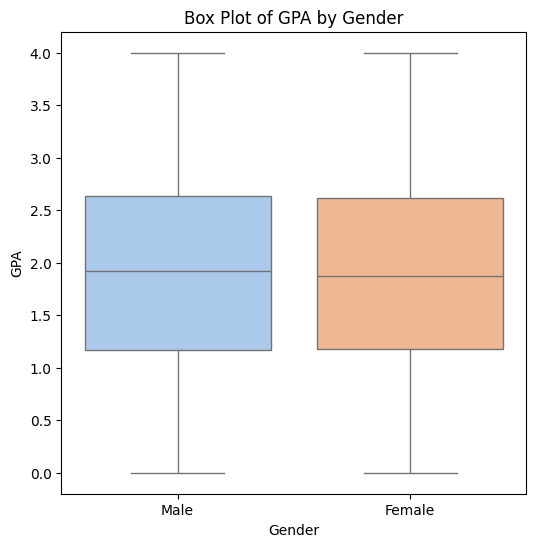

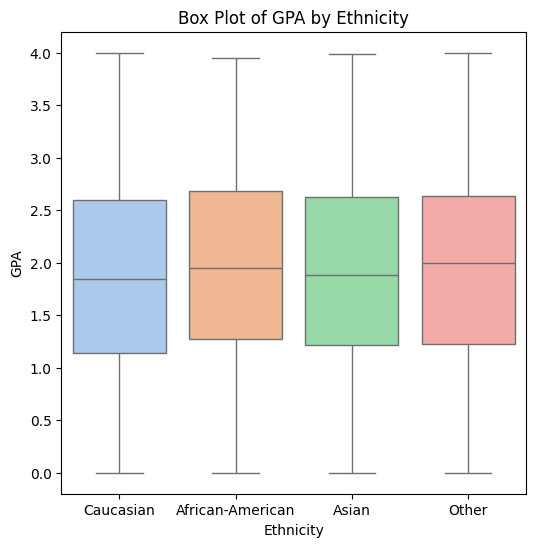

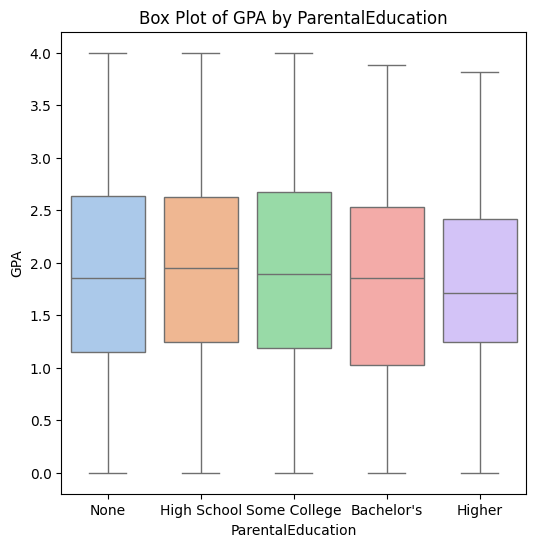

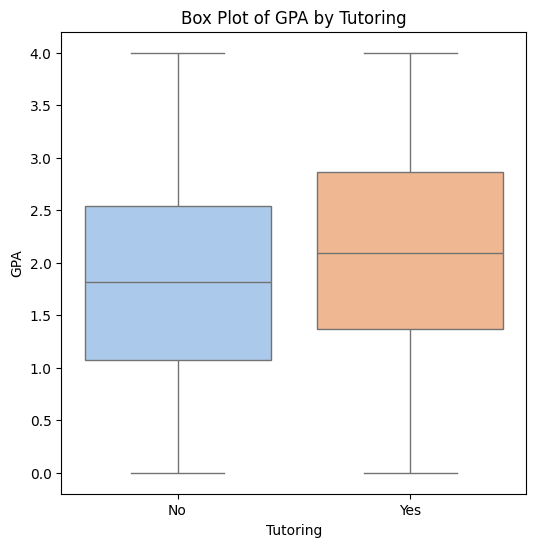

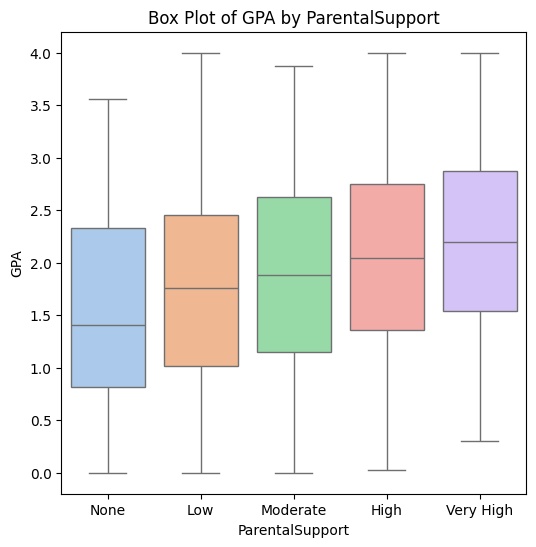

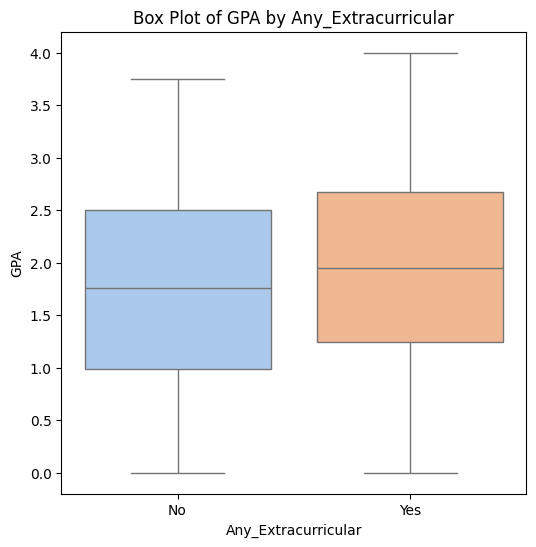

In [37]:
categorical_columns = ['Gender', 'Ethnicity', 'ParentalEducation', 'Tutoring', 'ParentalSupport', 'Any_Extracurricular']
labels = {
    'Gender': ['Male', 'Female'],
    'Ethnicity': ['Caucasian', 'African-American', 'Asian', 'Other'],
    'ParentalEducation': ['None', 'High School', 'Some College', 'Bachelor\'s', 'Higher'],
    'Tutoring': ['No', 'Yes'],
    'ParentalSupport': ['None', 'Low', 'Moderate', 'High', 'Very High'],
    'Any_Extracurricular': ['No', 'Yes']
}

for column in categorical_columns:
    plt.figure(figsize=(6, 6))
    sns.boxplot(x=column, y='GPA', data=raw_data, palette="pastel")
    plt.xlabel(column)
    plt.ylabel('GPA')
    plt.title(f'Box Plot of GPA by {column}')
    if column in labels:
        plt.xticks(ticks=range(len(labels[column])), labels=labels[column])
    plt.show()

From the EDA, we can see that:


*   Gender, Parental Education, Ethnicity doesn't seem to affect GPA much.
*   Parents' Support, participation inextracurricular activities, tutoring etc. seem to have a positive effect on GPA.



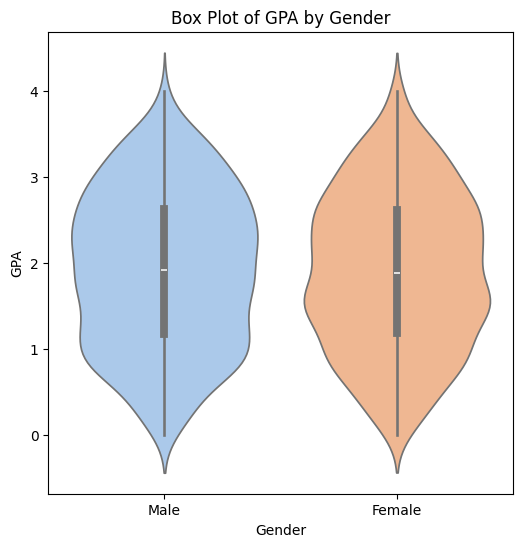

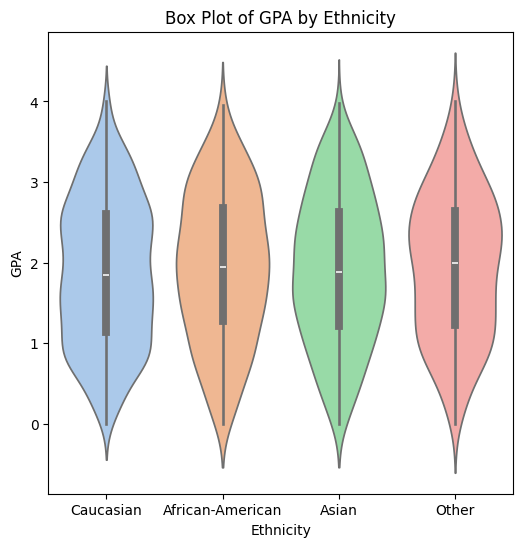

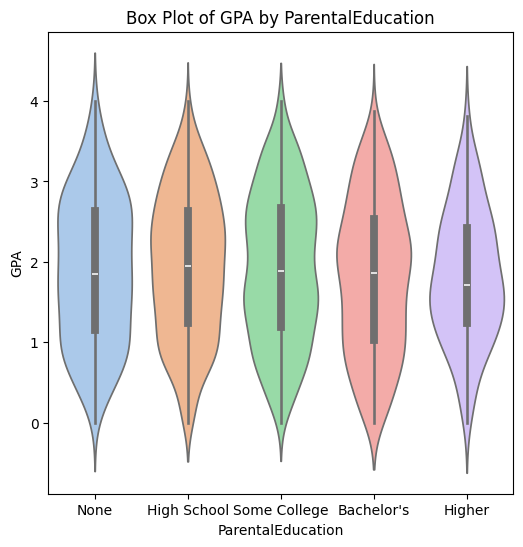

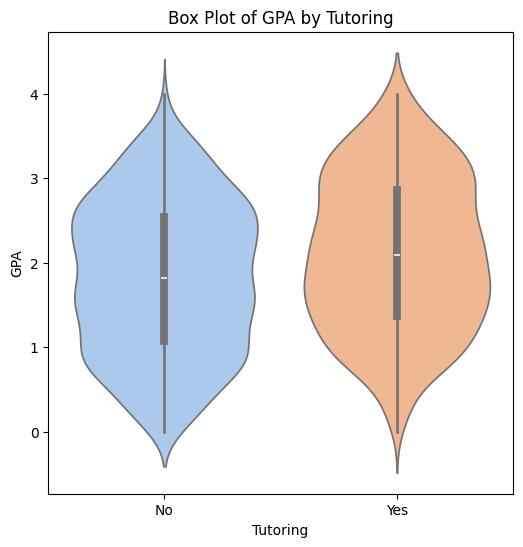

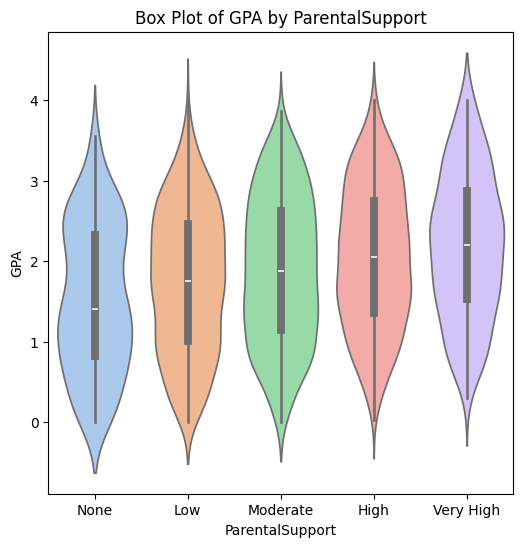

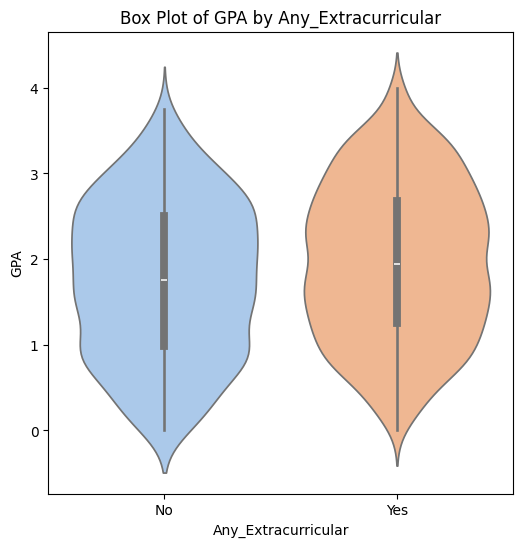

In [38]:
# Create violin plots for each categorical column against GPA
for column in categorical_columns:
    plt.figure(figsize=(6, 6))
    sns.violinplot(y='GPA', x=column,data=raw_data, split = False, palette='pastel')
    plt.xlabel(column)
    plt.ylabel('GPA')
    plt.title(f'Box Plot of GPA by {column}')
    if column in labels:
        plt.xticks(ticks=range(len(labels[column])), labels=labels[column])
    plt.show()

<Axes: xlabel='Absences', ylabel='GPA'>

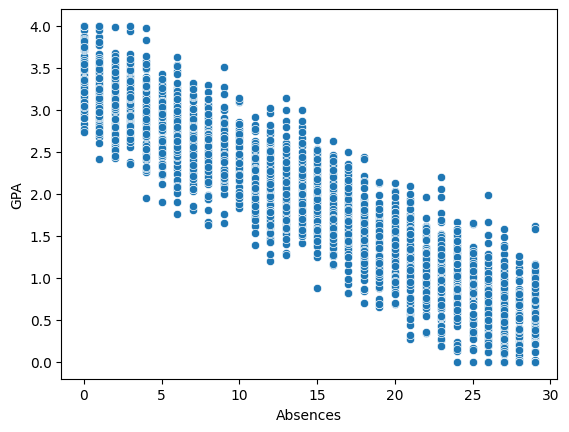

In [39]:
sns.scatterplot(data=raw_data, x='Absences', y='GPA', palette = 'pastel')

In [40]:
data = raw_data.drop('GradeClass', axis=1)
data.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,GPA,Any_Extracurricular
0,17,1,0,2,19.833723,7,1,2,2.929196,1
1,18,0,0,1,15.408756,0,0,1,3.042915,0
2,15,0,2,3,4.210570,26,0,2,0.112602,0
3,17,1,0,3,10.028829,14,0,3,2.054218,1
4,17,1,0,2,4.672495,17,1,3,1.288061,0


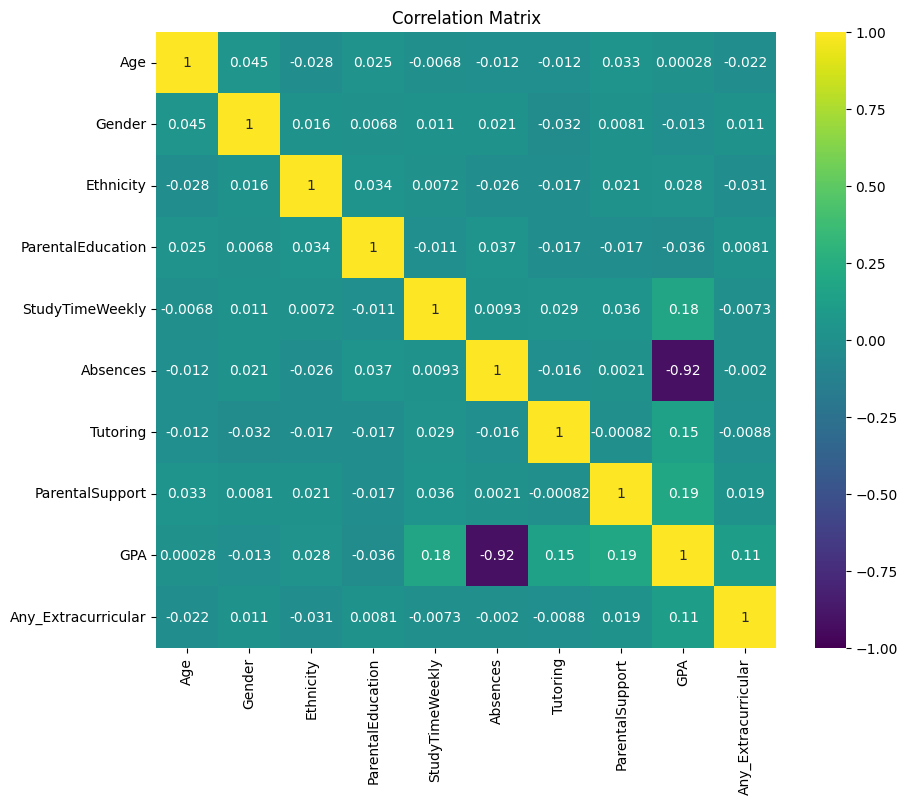

In [41]:
corr_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='viridis', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

There is very strong negative correlation between Absenses and GPA.

## Fitting the Model


In [42]:
raw_data.head()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,GPA,GradeClass,Any_Extracurricular
0,17,1,0,2,19.833723,7,1,2,2.929196,2.0,1
1,18,0,0,1,15.408756,0,0,1,3.042915,1.0,0
2,15,0,2,3,4.210570,26,0,2,0.112602,4.0,0
3,17,1,0,3,10.028829,14,0,3,2.054218,3.0,1
4,17,1,0,2,4.672495,17,1,3,1.288061,4.0,0


In [43]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  2392 non-null   int64  
 1   Gender               2392 non-null   object 
 2   Ethnicity            2392 non-null   object 
 3   ParentalEducation    2392 non-null   object 
 4   StudyTimeWeekly      2392 non-null   float64
 5   Absences             2392 non-null   int64  
 6   Tutoring             2392 non-null   object 
 7   ParentalSupport      2392 non-null   object 
 8   GPA                  2392 non-null   float64
 9   GradeClass           2392 non-null   object 
 10  Any_Extracurricular  2392 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 205.7+ KB


In [44]:
X = raw_data.drop(['GradeClass','GPA'], axis=1)
y = raw_data['GPA']

#### Multiple Linear Regression

In [45]:
import statsmodels.api as sm

# Adding a constant (intercept) to the model
X_with_intercept = sm.add_constant(X)
X_with_intercept = X_with_intercept.apply(pd.to_numeric, errors='coerce')
model = sm.OLS(y, X_with_intercept).fit()

# Print the summary which includes t-tests, F-test, and more
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     4273.
Date:                Mon, 29 Jul 2024   Prob (F-statistic):               0.00
Time:                        20:12:50   Log-Likelihood:                 217.21
No. Observations:                2392   AIC:                            -414.4
Df Residuals:                    2382   BIC:                            -356.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.6656    

As we can see there are some covariates with t-statistic having high p-values. (Gender, Ethnicity, Parental Education.)<br>
This indicates that they might not be statistically significant in predicting GPA.

#### Lasso Regularization for feature selection

In [46]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

X = raw_data[['Age', 'Gender', 'Ethnicity', 'StudyTimeWeekly', 'Absences', 'Tutoring',
          'ParentalSupport', 'ParentalEducation', 'Any_Extracurricular']]
y = raw_data['GPA']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

lasso = Lasso(alpha=0.025)
lasso.fit(X_train_scaled, y_train)

# Predicting the test set results
y_pred = lasso.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R-squared: {r2}')

coefficients = pd.DataFrame(lasso.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


Mean Squared Error: 0.05139966075547924
R-squared: 0.9389576915961958
                     Coefficient
Age                    -0.000000
Gender                 -0.000000
Ethnicity               0.000000
StudyTimeWeekly         0.144601
Absences               -0.814068
Tutoring                0.096583
ParentalSupport         0.141302
ParentalEducation      -0.000000
Any_Extracurricular     0.067927


Lasso regularization penalizes the covariates which are not significant in the regression model by shrinking their coefficients towards zero. <br>
This can effectively eliminate some features entirely by setting their coefficients to zero, which simplifies the model and helps in feature selection.<br>
As we can see here the covariates Age, Gender, Ethnicity, Parents’ Education do not have significant effect on the GPA.

##### Summary of the Reduced Final Model and Diagnostic Checks

In [47]:
X = raw_data[['StudyTimeWeekly', 'Absences', 'Tutoring',
          'ParentalSupport', 'Any_Extracurricular']]
y = raw_data['GPA']

X_with_intercept = sm.add_constant(X)
X_with_intercept = X_with_intercept.apply(pd.to_numeric, errors='coerce')
model = sm.OLS(y, X_with_intercept).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    GPA   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.941
Method:                 Least Squares   F-statistic:                     7676.
Date:                Mon, 29 Jul 2024   Prob (F-statistic):               0.00
Time:                        20:12:50   Log-Likelihood:                 213.03
No. Observations:                2392   AIC:                            -414.1
Df Residuals:                    2386   BIC:                            -379.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   2.5239    

**R-squared** is 0.941, indicating 94% variation in the GPA is explained by the covariates in the model.<br>
**Adjusted R-squared** accounts for the number of variables and penalizes excessive use of irrelevant features.  0.941 indicates that the model is good even after accounting for the number of features.

The **AIC** is almost the same for both models (full and reduced), indicating that the fit and complexity are balanced similarly between the two models.<br>
The **BIC** lesser for the reduced model, suggesting that the reduced model is more efficient, with a better balance between model fit and complexity.

**t-Test:**
All predictors in this final model have t-values with very high absolute values and p-values of 0.000, indicating they are statistically significant at level 0.05.

**F-Test:** The F-statistic of 7676 and a p-value of 0.00 indicate that the model is highly significant, meaning that the predictors collectively explain a significant portion of the variance in GPA.

**Durbin-Watson Test:**

The Durbin-Watson (DW) test is a statistical test used to detect the presence of autocorrelation (also known as serial correlation) in the residuals from a regression analysis. Autocorrelation occurs when the residuals (errors) are not independent of each other, which can affect the efficiency of the regression model and the validity of statistical tests.


*   0 < DW < 2: Positive autocorrelation.
*   DW = 2: No autocorrelation.
*   2 < DW < 4: Negative autocorrelation.

The Durbin-Watson statistic is 1.975, which is close to 2, suggesting that there is no significant autocorrelation in the residuals.

**Jarque-Bera Test:**

The Jarque-Bera (JB) test is a statistical test that checks whether the residuals from a regression model follow a normal distribution. It tests the null hypothesis that the residuals are normally distributed against the alternative hypothesis that they are not.

The Jarque-Bera statistic is 2.471 with a p-value of 0.291, indicating that there is no significant deviation from normality in the residuals.

With skewness nearly 0, the residuals are symmetric. <br>
With kurtosis nearly 3, the residuals are mesokurtic i.e. normally distributed.


In [48]:
X = raw_data[['StudyTimeWeekly', 'Absences', 'Tutoring',
          'ParentalSupport', 'Any_Extracurricular']]
y = raw_data['GPA']
X_with_intercept = sm.add_constant(X)  # Add constant (intercept) term
X_with_intercept = X_with_intercept.apply(pd.to_numeric, errors='coerce')

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_intercept.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_intercept.values, i)
                   for i in range(X_with_intercept.shape[1])]
print(vif_data)


               Feature        VIF
0                const  13.109138
1      StudyTimeWeekly   1.002279
2             Absences   1.000345
3             Tutoring   1.001164
4      ParentalSupport   1.001658
5  Any_Extracurricular   1.000499


The Variance Inflation Factor (VIF) quantifies how much the variance of a regression coefficient is inflated due to collinearity with other predictors in the model.

VIF = 1: No correlation between the predictor and all other predictors, implying no multicollinearity.<br>
1 < VIF < 5: Moderate correlation that is usually acceptable.<br>
VIF > 5: High correlation, indicating a potential multicollinearity problem that might require correction.<br>

All the features have VIF values close to 1, indicating that there is no significant multicollinearity among these predictors. This means that the predictors are not highly correlated with each other and can be reliably used in the regression model.
